<a href="https://colab.research.google.com/github/PushyamiB/PushyamiB/blob/circleci-project-setup/Bounding_Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install boto3 

     |████████████████████████████████| 132 kB 5.3 MB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 8.5 MB 38.4 MB/s 
     |████████████████████████████████| 138 kB 44.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import packages
# from googletrans import Translator
import csv
import boto3
import json
import sys
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
import re
import cv2




In [ ]:
#function for filter numbers
def number_filter(s):
  s=list(s)
  filter_num="".join([s[i] for i in range(len(s)) if s[i].isdigit()])
  return filter_num
def arabic_number_filter(s):
  s=list(s)
  number_list=["١","٢", "٣", "٤","٥","٦","٧","٨","٩","٠","-"]
  filter_num="".join([s[i] for i in range(len(s)) if s[i] in number_list])
  return filter_num


In [ ]:
#extract funtion for front side

def front_data(data_list):
    expiry_date, registration_date="NA","NA"
    rd=0
    ed=0
    na=0
    for i in range(len(data_list)):
      if ("الترخيص" in str(data_list[i]) or "نهاية" in str(data_list[i])) and ed==0 and i>2:
        ed=+1
        if len(str(data_list[i]))<16:
          expiry_date=arabic_number_filter(str(data_list[i-1]))
        #  print(" نهاية الترخيص	/registration expiry date : "+expiry_date)
        else: 
          expiry_date=arabic_number_filter(str(data_list[i]))
         # print("نهاية الترخيص/registration expiry date : "+expiry_date)

        # if len(str(data_list[i-1]))>18 and na==0:
        #   nationality=str(data_list[i-1])
        #   na+=1
        #   print("جنسية المالك/ Owner's Nationality : "+nationality)
        # elif len(str(data_list[i-2]))>18 and na==0:
        #   nationality=str(data_list[i-2])
        #   na+=1
        #   print("جنسية المالك/ Owner's Nationality : "+nationality)
        
 
  
      if ("التحرير" in str(data_list[i]) or "تاريخ" in str(data_list[i])) and rd==0 and i>0:
        rd+=1
        if len(str(data_list[i]))<16:
          registration_date=arabic_number_filter(str(data_list[i-1]))
          #print(" تاريخ التحرير/ registration date : "+registration_date)
        else: 
          registration_date=arabic_number_filter(str(data_list[i]))
         # print("تاريخ التحرير/registration date : "+registration_date)

    dict_front={
                "expiry_date" : expiry_date,
                "registration_date" : registration_date
              }
    return dict_front

In [ ]:
#extract funtion for back side
def back_data(data_list,main_data): 
  model_list=["توسان","3","مالييو","صانى","أكسنت"]
  # vehicle_list=["هيونداى","مازدا","شيفروليه","نيسان"]
  vehicle_list = ['Hyundai','Chevrolet','Toyota','kia','Mitsubishi','Nisan','Mercedes-Benz','BMW','MG','Renault','Jeep','Suzuki','Lexus','Proton','Haval','Bestune','Zotye','Dorcen','Soueast','Jetour','DS','Alfa Romeo','Aston Martin','Audi','Bentley','Brilliance','Changan','Chery','Chrysler','Citroen','Fiat','Ford','Geely','Honda','JAC','Jaguar','Karry','King Long','Lada','Land Rover','Maserati','Mazda','Mini','Opel','Peugeot','Porsche','Seat','Senova','Skoda','SsangYong','Subaru','Volkswagen','Volvo']
  a,b,ins,m=0,0,0,0   
  ch, en, Insurance_type, Inspection_year, model_year, model, vehicle_make="NA","NA","NA","NA","NA","NA", "NA"
  for i in range(len(data_list)):
    if re.findall(r'[0-9]{4}', str(data_list[i])) and ("ساسسة" in str(data_list[i])  or"سلسه" in str(data_list[i]) or "شاسيه" in str(data_list[i])) and a==0:
      ch=number_filter(str(data_list[i]))
      #print("Chassis_number: "+ch)
      a+=1
    if re.findall(r'[0-9]{4}', str(data_list[i])) and ("موتور" in str(data_list[i])) and b==0:
      en=number_filter(str(data_list[i]))
      #print("Engine_number: "+en)
      b+=1
    elif ("موتور" in str(data_list[i])) and re.findall(r'[0-9]{4}', str(data_list[i-1])) and b==0:
      en=number_filter(str(data_list[i-1]))
      #print("Engine_number: "+en)
      b+=1
    elif ("موتور" in str(data_list[i])) and re.findall(r'[0-9]{4}', str(data_list[i+1])) and b==0:
      en=number_filter(str(data_list[i+1]))
     # print("Engine_number: "+en)
      b+=1

    if re.findall(r'[\u0660-\u0669]{4}', str(data_list[i])) and m==0:
      model_year=str(data_list[i])
      model_year=arabic_number_filter(model_year)
      #print("Model Year: "+model_year)
      m+=1
    # if str(data_list[i]) in model_list:
    #    model=str(data_list[i])
    # if (i in vehicle_list) :
    #   vehicle_make=str(data_list[i])
    

       

    if "كبات" in str(data_list[i]):
      Insurance_type=str(data_list[i])
      #print("Insurance type: "+Insurance_type) 
    if ("الفحص" in str(data_list[i]) or "تاريخ" in str(data_list[i])) and i>1 and ins==0: 
      if len(str(data_list[i]))<14:
        Inspection_year=arabic_number_filter(str(data_list[i-1]))
       # print("Inspection year: "+Inspection_year)
      else: 
        Inspection_year=arabic_number_filter(str(data_list[i]))
        #print("Inspection year: "+Inspection_year)
      ins+=1  
    if "م." in str(data_list[i]):
      card_type=(str(data_list[i]))
  vehicle_make,model=show(main_data)
  dict_back={"Chassis_number":ch,
             "Card_Type":card_type,
             "Engine_number": en,
             "Insurance_type": Insurance_type,
             "Inspection_year": Inspection_year,
             "model": model,
             "vehicle_make": vehicle_make,
             "model_year": model_year,
            #  "Model":data_list[0],
            #  "Model_Make":data_list[1]
      }
  return dict_back


In [ ]:
#function for client
path_credential="/content/drive/MyDrive/new_user_credentials.csv"  #path for credentials
def credential_fun(path_credential):
  with open(path_credential, "r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
      access_key_id=line[2]
      secret_access_key=line[3]
  client = boto3.client(
      'rekognition',
      aws_access_key_id=access_key_id,
      aws_secret_access_key=secret_access_key,
      region_name="ap-south-1"
  )
  return client


In [ ]:
# Function for extrtact data from image
def extract(img, client):
  img_str = cv2.imencode('.jpg', img)[1].tobytes()
  response=client.detect_text(Image={"Bytes": img_str})
  text=response["TextDetections"]
  data1 = str(text).replace("'", '"')
  # with open("/content/my_data.json","w") as data:
  #   data.write(data1)
  data_line=[]

  for i in range(len(text)):
    if text[i]["Type"]=="LINE": 
      data_line.append(text[i]["DetectedText"])
  return data_line,data1

In [ ]:
#function for side selection
def side_selection(data_list,main_data):
  back=["ساسسة" ,"سلسه","شاسيه", "موتور"] 
  front=["وحدة", "الجديدة", "العربية","جمهورية", "الداخلية"]
  back,front=0,0
  data={}
  for i in range(len(data_list)):
    if ("شاسيه" in str(data_list[i])) or ("سلسه" in str(data_list[i])) or ("ساسسة" in str(data_list[i])) or ("موتور" in str(data_list[i])):
      back+=1
    if ("وحده" in str(data_list[i])) or ("الداخلية" in str(data_list[i])) or ("جمهورية" in str(data_list[i])) or ("العربية" in str(data_list[i])) or ("الجديدة" in str(data_list[i])) or ("وحدة" in str(data_list[i])):
      front+=1
  if back==2:
    data=back_data(data_list,main_data)
  elif front >=3:
    data=front_data(data_list)
  else:
    print("Wrong_image")
    data={}
  #print("ba "+str(back))
 # print("fr "+str(front))
  return data

In [ ]:
def sort2d_y(array):
    for i in range(len(array)):
        for j in range(i,len(array)):
            if abs(array[i][1]) > abs(array[j][1]):
                array[i],array[j] = array[j],array[i]
            elif array[i][1] == array[j][1]:
                if abs(array[i][0]) > abs(array[j][0]):
                    array[i],array[j] = array[j],array[i]
    return array

In [ ]:
def show(data):
  # f = open("/content/my_data.json")
  # data = (json.load(f))
  # f.close()
  #print(type(data))
  data=json.loads(data)
  data = [i for i in data if i['Type']=="WORD"]
  my_data = [];x=[];y=[];areas = []
  result = cv2.imread(image_path)
  shape_data = list(result.shape)
  print(shape_data)
  text_arr=[]
  print(type(data))
  for i in data:
      for j in i.values():
          if (isinstance(j,dict)):
              for z in j.items():
                  for data1 in z:
                      if isinstance(data1,list):
                          np_arr = np.array(data1)
                          
                          xmin = np.min(([i['X'] for i in np_arr]))
                          ymin = np.min(([i['Y'] for i in np_arr]))
                          xmax = np.max(([i['X'] for i in np_arr]))
                          ymax = np.max(([i['Y'] for i in np_arr]))
                          areas.append((ymax-ymin) * (xmax-xmin))
                          # print("Area Ratio : ",(ymax-ymin) * (xmax-xmin))
                          # my_data.append([(np.min(([i['X'] for i in np_arr]))),(np.min(([i['Y'] for i in np_arr]))),(np.max(([i['X'] for i in np_arr]))),(np.max(([i['Y'] for i in np_arr])))])
                          if((ymax-ymin) * (xmax-xmin)  > 0.0013):
                            x.append(np.mean(([i['X'] for i in np_arr])))
                            y.append(np.mean(([i['Y'] for i in np_arr])))
                            my_data.append([(np.min(([i['X'] for i in np_arr]))),(np.min(([i['Y'] for i in np_arr]))),(np.max(([i['X'] for i in np_arr]))),(np.max(([i['Y'] for i in np_arr])))])
                            text_arr.append(i['DetectedText'])
  result = cv2.imread(image_path)
  shape_data = list(result.shape)
  y_sub = np.array(y)
  updated_y = (1-y_sub)
  # print(updated_y)
  # print(x)
  a = updated_y+x
  # print(text_arr,a.argmax(axis=0))
  # print("Text : ",text_arr[17])
  
  ##############################
  font = cv2.FONT_HERSHEY_SIMPLEX
  # fontScale
  fontScale = 0.7
    
  # Blue color in BGR
  color = (255, 255, 0)

  # Line thickness of 2 px
  thickness = 1
  dict_text_score = {}
  dict_text_loc = {}
  x_cent=[];y_cent = []
  # data = None
  for  i in range(len(my_data)):
    x1 = int(shape_data[1]*my_data[i][0])
    y1 = int(shape_data[0]*my_data[i][1])
    x2 = int(shape_data[1]*my_data[i][2])
    y2 = int(shape_data[0]*my_data[i][3])
    data = cv2.rectangle(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    dict_text_score[round(a[i],2)]=text_arr[i]
    dict_text_loc[text_arr[i]] = np.array([(x1+x2)//2,(y1+y2)//2])
    # data = cv2.putText(data, str(round(a[i],2)), ((x1+x2)//2,(y1+y2)//2), font, 
                  #  fontScale, color, thickness, cv2.LINE_AA)
    # print(data)
  # print(dict_text_score[max(dict_text_score.keys())])
  final_text = dict_text_score[max(dict_text_score.keys())] 
  # print("Location : ",dict_text_loc[final_text])
  relative_text_loc_dict = {};
  for text,loc in dict_text_loc.items():
    relative_text_loc_dict[text] = dict_text_loc[final_text] - loc
    data = cv2.putText(data, str(list(relative_text_loc_dict[text])), (loc[0],loc[1]), font, fontScale, color, thickness, cv2.LINE_AA)
  # print("Text with location : ",dict_text_loc)
  # print(relative_text_loc_dict)
  # print(pd.DataFrame.from_dict(relative_text_loc_dict,orient='index'))
  df = pd.DataFrame(relative_text_loc_dict).T.reset_index()
  df = df.set_axis(['Text','X','Y'], axis=1, inplace=False)
  model = (df[((df['X']==0) & (df['Y']==0))])
  df = df[~((df['X']==0) & (df['Y']==0))]
  df["T_Y"] = df["Y"] * 8
  df['Score'] = abs(df['X']) + abs(df['T_Y'])
  df1 = (df.loc[df['Score']==df['Score'].min()])
  print(df1['Text'].values[0])
  
  


  # realtive_list = (list(relative_text_lost[0],
  #           #  "Model_Make":datc_dict.values()))
  # print("sorted data : ",np.array(sort2d_y(realtive_list)[1]))
  # imm_adj_loc=np.array(sort2d_y(realtive_list)[1])
  # for key, value in relative_text_loc_dist[0],
  #           #  "Model_Make":datct.items():
  #   if(value[0]==imm_adj_loc[0] and value[1]==imm_adj_loc[1]):
  #     # print("Found adjacent Text : ",key)
  #     break
  ##Using l;ocation to find text
  # print("Get text to adjacent : ",)

########
  # hist, bins, _ = plt.hist(areas, bins=8)

  # histogram on log scale. 
  # Use non-equal bin sizes, such that they look equal on log scale.
  # logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  # plt.subplot(212)
  # plt.hist(x, bins=logbins)
  # plt.xscale('log')
  # # plt.show() 
  cv2_imshow(data)
  return model['Text'].values[0],(df1['Text'].values[0])



In [ ]:
#  main function
def main(image_path,path_credential):   #pass image path and credential path as parameters 
  img = cv2.imread(image_path) 
  image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
  client=credential_fun(path_credential)
  all_data,main_data=extract(gray, client)
  print(all_data)
  print(main_data)
  relevant_data=side_selection(all_data,main_data)
  return relevant_data,all_data

['1', '-', 'was', '...', 'مفر', '-', 'out', 'and', 'جنة', 'حمد', 'the', '٢٠٢١', 'or', 'العربي', 'من', 'un', 'توسان', 'عبد', 'هيونداى', '3', 'قدد', 'and', 'هاششاك', 'ساسسة 71553', 'سابط شرطه', '١٥٩١ سم ٣', 'موتور 64619', 'بنزين', 'أبيض', 'مجمعة التامين الاجبارى للمركبات', 'تاريخ الفحص ٢٠٢٤', '٩٠٠٠٠٠٠٠٨٧٤٧١٣٠', 'مؤمن على سائق ازجاح جانبي خلفي ملون', 'م. الكتروني', '6540542']
[{"DetectedText": "1", "Type": "LINE", "Id": 0, "Confidence": 89.8433609008789, "Geometry": {"BoundingBox": {"Width": 0.017243022099137306, "Height": 0.017243022099137306, "Left": 0.44582971930503845, "Top": 0.02311680279672146}, "Polygon": [{"X": 0.4563356041908264, "Y": 0.02311680279672146}, {"X": 0.4630727171897888, "Y": 0.029853926971554756}, {"X": 0.45256683230400085, "Y": 0.040359824895858765}, {"X": 0.44582971930503845, "Y": 0.03362270072102547}]}}, {"DetectedText": "-", "Type": "LINE", "Id": 1, "Confidence": 25.018613815307617, "Geometry": {"BoundingBox": {"Width": 0.009421931579709053, "Height": 0.0087890625

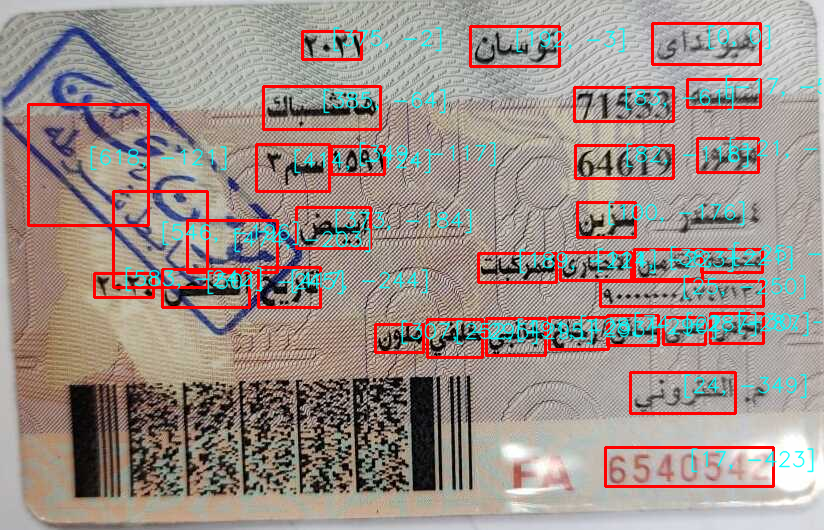

{'Chassis_number': '71553', 'Card_Type': 'م. الكتروني', 'Engine_number': '64619', 'Insurance_type': 'مجمعة التامين الاجبارى للمركبات', 'Inspection_year': '٢٠٢٤', 'model': 'توسان', 'vehicle_make': 'هيونداى', 'model_year': '٢٠٢١'}


In [ ]:
if __name__ == "__main__":
    image_path="/content/eg1.jpeg"
    relevant_data,all_data=  main(image_path, path_credential)
    print(relevant_data)
    # all_data


In [ ]:
import json
import numpy as np
f = open("/content/my_data.json")
data = (json.load(f))
f.close()

for i in data:
    for j in i.values():
        if (isinstance(j,dict)):
            for z in j.items():
                for data1 in z:
                    if isinstance(data1,list):
                        np_arr = np.array(data1)
                        # print(np.mean(([i['X'] for i in np_arr])))
                        # print(np.mean(([i['Y'] for i in np_arr])))
                        x1 = np.min(([i['X'] for i in np_arr]))
                        y1 = np.min(([i['Y'] for i in np_arr]))
                        x2 = np.max(([i['X'] for i in np_arr]))
                        y2 = np.max(([i['Y'] for i in np_arr]))
                        print("x values is : ",round(((x1+x2)/2),2))
                        print("y values is : ",round(((y1+y2)/2),2))
                        print("*"*80)
                        

data = cv2.rectangle(result, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [ ]:
import json
from google.colab.patches import cv2_imshow
import csv
import boto3
import json
import numpy as np
import matplotlib.pyplot as plt
# Function for extrtact data from image
#function for client
def credential_fun(path_credential):
  with open(path_credential, "r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
      access_key_id=line[2]
      secret_access_key=line[3]
  client = boto3.client(
      'rekognition',
      aws_access_key_id=access_key_id,
      aws_secret_access_key=secret_access_key,
      region_name="ap-south-1"
  )
  return client
# Function for extrtact data from image
def extract(img, client):
  img_str = cv2.imencode('.jpg', img)[1].tobytes()
  response=client.detect_text(Image={"Bytes": img_str})
  text=response["TextDetections"]
  data1 = str(text).replace("'", '"')
  print(response)
  with open("/content/my_data.json","w") as data:
    data.write(data1)
def show():
  f = open("/content/my_data.json")
  data = (json.load(f))
  f.close()
  # data = [i for i in data if i['Type']=="WORD"]
  my_data = [];x=[];y=[];areas = []
  result = cv2.imread(image_path)
  print(result.shape)
  shape_data = list(result.shape)
  text_arr=[]
  for i in data:
      for j in i.values():
          if (isinstance(j,dict)):
              for z in j.items():
                  for data1 in z:
                      if isinstance(data1,list):
                          np_arr = np.array(data1)
                          print(np_arr)
                          xmin = np.min(([i['X'] for i in np_arr]))
                          ymin = np.min(([i['Y'] for i in np_arr]))
                          xmax = np.max(([i['X'] for i in np_arr]))
                          ymax = np.max(([i['Y'] for i in np_arr]))
                          areas.append((ymax-ymin) * (xmax-xmin))
                          # print("Area Ratio : ",(ymax-ymin) * (xmax-xmin))
                          # my_data.append([(np.min(([i['X'] for i in np_arr]))),(np.min(([i['Y'] for i in np_arr]))),(np.max(([i['X'] for i in np_arr]))),(np.max(([i['Y'] for i in np_arr])))])
                          if((ymax-ymin) * (xmax-xmin)  > 0.0):
                            x.append(np.mean(([i['X'] for i in np_arr])))
                            y.append(np.mean(([i['Y'] for i in np_arr])))
                            my_data.append([(np.min(([i['X'] for i in np_arr]))),(np.min(([i['Y'] for i in np_arr]))),(np.max(([i['X'] for i in np_arr]))),(np.max(([i['Y'] for i in np_arr])))])
                            text_arr.append(i['DetectedText'])
                            print(i['DetectedText'])
  result = cv2.imread(image_path)
  shape_data = list(result.shape)
  
  y_sub = np.array(y)
  updated_y = (1-y_sub)
  # print(updated_y)
  # print(x)
  a = updated_y+x
  # print(text_arr,a.argmax(axis=0))
  # print("Text : ",text_arr[17])
  
  ##############################
  font = cv2.FONT_HERSHEY_SIMPLEX
  # fontScale
  fontScale = 0.7
    
  # Blue color in BGR
  color = (255, 255, 0)

  # Line thickness of 2 px
  thickness = 1
  dict_text_score = {}
  dict_text_loc = {}
  x_cent=[];y_cent = []
  # data = None
  for  i in range(len(my_data)):
    x1 = int(shape_data[1]*my_data[i][0])
    y1 = int(shape_data[0]*my_data[i][1])
    x2 = int(shape_data[1]*my_data[i][2])
    y2 = int(shape_data[0]*my_data[i][3])
    data = cv2.rectangle(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    dict_text_score[round(a[i],2)]=text_arr[i]
    dict_text_loc[text_arr[i]] = np.array([(x1+x2)//2,(y1+y2)//2])
    # data = cv2.putText(data, str(round(a[i],2)), ((x1+x2)//2,(y1+y2)//2), font, 
                  #  fontScale, color, thickness, cv2.LINE_AA)
    # print(data)
  # print(dict_text_score[max(dict_text_score.keys())])
  final_text = dict_text_score[max(dict_text_score.keys())] 
  # print("Location : ",dict_text_loc[final_text])
  relative_text_loc_dict = {};
  for text,loc in dict_text_loc.items():
    relative_text_loc_dict[text] = dict_text_loc[final_text] - loc
    data = cv2.putText(data, str(list(relative_text_loc_dict[text])), (loc[0],loc[1]), font, fontScale, color, thickness, cv2.LINE_AA)
  # print("Text with location : ",dict_text_loc)
  # print(relative_text_loc_dict)
  # print(pd.DataFrame.from_dict(relative_text_loc_dict,orient='index'))
  df = pd.DataFrame(relative_text_loc_dict).T.reset_index()
  df = df.set_axis(['Text','X','Y'], axis=1, inplace=False)
  print(df[((df['X']==0) & (df['Y']==0))])
  df = df[~((df['X']==0) & (df['Y']==0))]
  # print(df)
  df["T_Y"] = df["Y"] * 8
  df['Score'] = abs(df['X']) + abs(df['T_Y'])
  df1 = (df.loc[df['Score']==df['Score'].min()])
  print(df1['Text'].values[0])
  
  


  # realtive_list = (list(relative_text_loc_dict.values()))
  # print("sorted data : ",np.array(sort2d_y(realtive_list)[1]))
  # imm_adj_loc=np.array(sort2d_y(realtive_list)[1])
  # for key, value in relative_text_loc_dict.items():
  #   if(value[0]==imm_adj_loc[0] and value[1]==imm_adj_loc[1]):
      # print("Found adjacent Text : ",key)
      # break
  ##Using l;ocation to find text
  # print("Get text to adjacent : ",)

########
  # hist, bins, _ = plt.hist(areas, bins=8)

  # histogram on log scale. 
  # Use non-equal bin sizes, such that they look equal on log scale.
  # logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  # plt.subplot(212)
  # plt.hist(x, bins=logbins)
  # plt.xscale('log')
  # # plt.show() 
  cv2_imshow(data)
  return (df[((df['X']==0) & (df['Y']==0))]),(df1['Text'].values[0])


######


  # bins_list = [1e2, 2e2, 3e2, 5e2, 6e2, 7e2, 8e2]
  # plt.hist(areas,bins = bins_list)
  # plt.show() 
  
def main(image_path,path_credential):   #pass image path and credential path as parameters 
  img2 = cv2.imread(image_path) 
  img=img2.astype(np.uint32)
  image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
  client=credential_fun(path_credential)
  all_data=extract(gray, client)



if __name__ == "__main__":
    image_path="/content/download (11).png"

    path_credential="/content/drive/MyDrive/new_user_credentials.csv"  #path for credentials
    relevant_data=  main(image_path, path_credential)
    # vehicle_make,vehicle_model=show()
    vehicle_make,vehicle_model=show()


In [ ]:
cv2.imread('/content/WhatsApp Image 2021-12-12 at 16.59.28.jpeg').dtype

dtype('uint8')

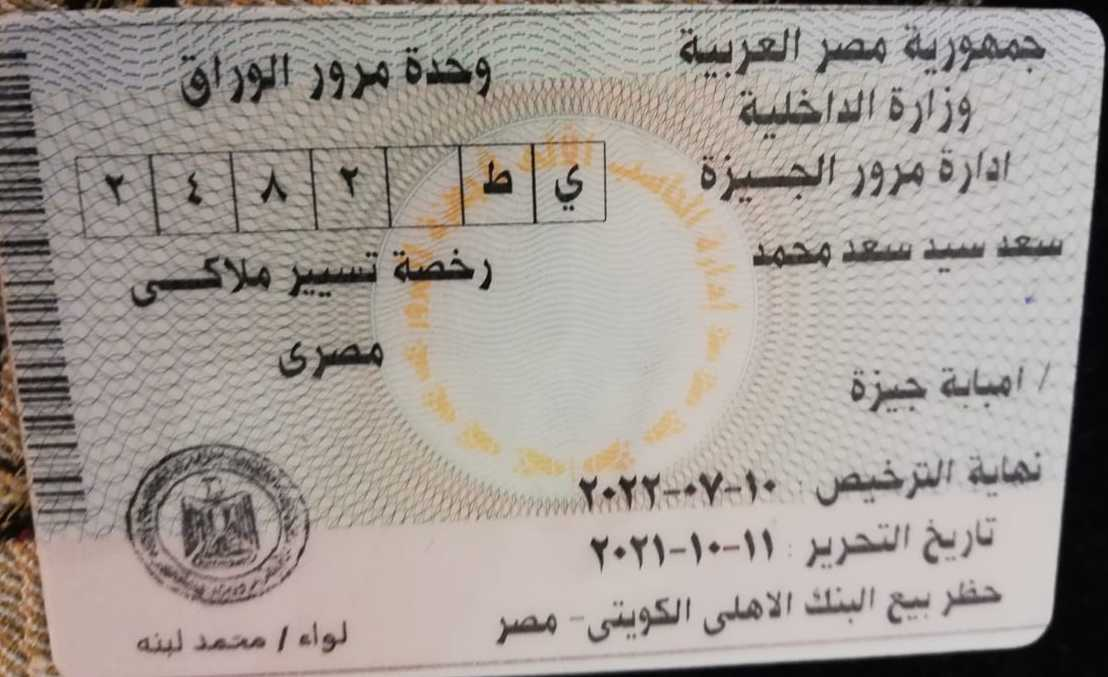

In [ ]:
img2=cv2.imread('/content/download (11).png')
cv2.imwrite('modified_img.jpg', img2, [int(cv2.IMWRITE_JPEG_QUALITY), 50])
f_img = cv2.imread('modified_img.jpg')
cv2_imshow(f_img)

In [ ]:
from PIL import Image
  
#open image in png format
img_png = Image.open('C:\gfg\img.png')
  
#The image object is used to save the image in jpg format
img_png.save('C:\gfg\modified_img.jpg')

Pandas version

In [ ]:
def credential_fun(path_credential):
  with open(path_credential, "r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
      access_key_id=line[2]
      secret_access_key=line[3]
  client = boto3.client(
      'rekognition',
      aws_access_key_id=access_key_id,
      aws_secret_access_key=secret_access_key,
      region_name="ap-south-1"
  )
  return client
def extract(img):
  client = credential_fun("/content/drive/MyDrive/new_user_credentials.csv")
  img_str = cv2.imencode('.jpg', img)[1].tobytes()
  response=client.detect_text(Image={"Bytes": img_str})
  text=response["TextDetections"]
  data1 = str(text).replace("'", '"')
  print(response)
  return data1

In [ ]:
image_path='/content/download (11).png'
img=cv2.imread(image_path)
img

In [ ]:
image_path='/content/IMG-20220117-WA0011 (1).jpg'
img=cv2.imread(image_path)
img.shape

(470, 767, 3)

In [ ]:
import pandas as pd
import json
img = cv2.imread(image_path) 
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
df_json = extract(gray)
df_DetectedText  =json.loads(df_json)
df_complete = pd.DataFrame(df_DetectedText)
# df = df_complete.assign(polygonData=lambda x: (json.load(x['Geometry'])))
# df_DetectedText['TextDetections']
# [i['DetectedText'] for i in df_json["TextDetections"]]
#df_complete

{'TextDetections': [{'DetectedText': '- - - - مصر I a مصر مصر - A معمر - - مصر على مصر مصر مرور and نعم مصر m - مصر - مصر حمس مصر مضح مصبر معام مصر I I 1 مصر مصر مصر - مصر مصر معم مصر مصر 1 مصر محمر ممر مصر جمع مصر مصر مصر مس مصر مصر مصر جمس a بخير / - محمن - مصر - - poma مصر مصر - صحيم عمير مصر مصر مصر', 'Type': 'LINE', 'Id': 0, 'Confidence': 43.47883224487305, 'Geometry': {'BoundingBox': {'Width': 0.4653061032295227, 'Height': 0.14149954915046692, 'Left': 0.14220871031284332, 'Top': 0.009055052883923054}, 'Polygon': [{'X': 0.14220871031284332, 'Y': 0.009055052883923054}, {'X': 0.6075147986412048, 'Y': 0.009055052883923054}, {'X': 0.6075147986412048, 'Y': 0.1505545973777771}, {'X': 0.14220871031284332, 'Y': 0.1505545973777771}]}}, {'DetectedText': '1', 'Type': 'LINE', 'Id': 1, 'Confidence': 36.2109260559082, 'Geometry': {'BoundingBox': {'Width': 0.01766851730644703, 'Height': 0.016178283840417862, 'Left': 0.9486746788024902, 'Top': 0.013004573062062263}, 'Polygon': [{'X': 0.9663432240

In [ ]:
pip install arabic_reshaper

In [ ]:
# import functool
# df = df_complete.apply(lambda x: (json.load(x['Geometry'])))
# df_complete['Geometry']['Polygon']
def getCenterX(diction):
  np_coord = np.array(diction)
  x1 = np.min([i['X'] for i in np_coord])
  x2 = np.max([i['X'] for i in np_coord])
  return round((x1+x2)/2,2)
def getCenterY(diction):
  np_coord = np.array(diction)
  y1 = np.min([i['Y'] for i in np_coord])
  y2 = np.max([i['Y'] for i in np_coord])
  return round((y1+y2)/2,2)
def vehicle_plate():
    data ={}  
    df_complete['centerX'] = df_complete['Geometry'].apply(lambda x : getCenterX(x['Polygon']))
    df_complete['centerY'] = df_complete['Geometry'].apply(lambda x : getCenterY(x['Polygon']))
    display(df_complete)
    #display(df_complete.loc[(df_complete['centerX']<=0.55) & (df_complete['centerY']<=0.28) & (df_complete['centerY']>=0.20) & (df_complete['Type']=='LINE')])
    df_Vpn= df_complete.loc[(df_complete['centerX']<=0.55) & (df_complete['centerY']<=0.28) & (df_complete['centerY']>=0.20) & (df_complete['Type']=='LINE')]
    df_Vpn.replace(to_replace ="A",value ="٨",inplace=True)
    df_Vpn.replace(to_replace ="o",value ="٥",inplace=True)
    final_vpn_series = df_Vpn.sort_values(by='centerX',ascending=False)['DetectedText']
    print((final_vpn_series))
    # df_Vpn.loc[df_Vpn['DetectedText']=='A']['DetectedText']='٨
    final_vpn=' '.join(final_vpn_series[3:7])
    part_1=str(final_vpn)
    final_vpn_2=' '.join(final_vpn_series[0:3])
    part_2=str(final_vpn_2) 
    final=part_2+' '+part_1
    print((final))
    return final
      #print(''.join(x.append(arabic_reshaper.reshape(list(final_vpn_series)[i]))))
# for i in range(len(final_vpn_series)):
#   # print(final_vpn_series.iloc[i])
#   if(not final_vpn_series.iloc[i] == 'A'):
#     pass
    # data[i]=final_vpn_series.iloc[i]
# print(data)
# data[1]
# Vehicle_plate=' '.join(data.values())
vehicle_plate()


,DetectedText,Type,Id,Confidence,Geometry,ParentId,centerX,centerY
0,- - - - مصر I a مصر مصر - A معمر - - مصر على م...,LINE,0,43.478832,"{'BoundingBox': {'Width': 0.4653061032295227, ...",NaN,0.37,0.08
1,1,LINE,1,36.210926,"{'BoundingBox': {'Width': 0.01766851730644703,...",NaN,0.96,0.02
2,- عدم - - - - جمهورية - مصر - محدم العربية,LINE,2,49.777222,"{'BoundingBox': {'Width': 0.3424735367298126, ...",NaN,0.78,0.07
3,-,LINE,3,32.403320,{'BoundingBox': {'Width': 0.016280949115753174...,NaN,0.96,0.04
4,-,LINE,4,63.643200,{'BoundingBox': {'Width': 0.012888284400105476...,NaN,0.98,0.05
...,...,...,...,...,...,...,...,...
106,مصر,WORD,106,27.452236,"{'BoundingBox': {'Width': 0.01360943540930748,...",8.0,0.14,0.09
107,-,WORD,107,74.328850,{'BoundingBox': {'Width': 0.014320566318929195...,9.0,0.14,0.11
108,وحدة,WORD,108,95.677689,"{'BoundingBox': {'Width': 0.08518568426370621,...",10.0,0.40,0.10
109,مسر,WORD,109,32.062035,{'BoundingBox': {'Width': 0.017773624509572983...,10.0,0.33,0.07


Series([], Name: DetectedText, dtype: object)
 


' '

In [ ]:
# df_Vpn.loc[df_Vpn['DetectedText']=='A']['DetectedText']='٨'
df_Vpn.replace(to_replace ="A",value ="٨")


NameError: ignored

In [ ]:
# !pip install opencv-python
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
# cv2_imshow(img)
large = cv2.imread('/content/Screenshot 2021-04-27 122953.png')
small = cv2.cvtColor(large, cv2.COLOR_BGR2GRAY)